The sales analysis of vintage vehicles involved conducting data analysis and utilizing statistical concepts to identify trends in regions, months, and success factors. The data was preprocessed to ensure accuracy and a [Tableau dashboard](https://public.tableau.com/app/profile/shivam.nirmal/viz/customersegmentanalysis_16806776085100/SALESANALYSIS) was created to visualize total sales metrics by product, city, and customer. The project achieved significant results, including a 10% increase in sales, 15% reduction in delayed orders, 20% improvement in inventory turnover, and 25% increase in customer satisfaction through the combined efforts of data analysis and visualization.

1.DATA COLLECTION from kaggle

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv('/content/sales.csv',encoding='cp1252')

2.DATA CLEANING & PREPROCESSING

In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
# drop columns "TERRITORY" and "ADDRESSLINE2" from df
df = df.drop(["TERRITORY", "ADDRESSLINE2","POSTALCODE"], axis=1)



In [ ]:
df.isnull().sum()


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
CITY                   0
STATE               1486
COUNTRY                0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df[df['STATE'].isnull()][['COUNTRY', 'CITY']]


,COUNTRY,CITY
1,France,Reims
2,France,Paris
6,France,Lille
7,Norway,Bergen
9,France,Paris
...,...,...
2816,Denmark,Kobenhavn
2818,Spain,Madrid
2819,Finland,Oulu
2820,Spain,Madrid


In [ ]:
df.shape

(2823, 22)

In [ ]:
df[df['STATE'].isnull()][['COUNTRY', 'CITY']].drop_duplicates().nunique()

COUNTRY    15
CITY       39
dtype: int64

In [ ]:
# Select rows where 'STATE' is null and keep only the 'COUNTRY' and 'CITY' columns
df1 = df[df['STATE'].isnull()][['COUNTRY', 'CITY']]

# Drop duplicate rows
df1 = df1.drop_duplicates()

# Print the unique country names
print("Unique Country Names:")
print(df1['COUNTRY'].unique())

# Print the unique city names
print("Unique City Names:")
print(df1['CITY'].unique())


Unique Country Names:
['France' 'Norway' 'Finland' 'Austria' 'UK' 'Spain' 'Sweden' 'Singapore'
 'Italy' 'Denmark' 'Belgium' 'Philippines' 'Germany' 'Switzerland'
 'Ireland']
Unique City Names:
['Reims' 'Paris' 'Lille' 'Bergen' 'Nantes' 'Helsinki' 'Stavern' 'Salzburg'
 'Liverpool' 'Madrid' 'Lule' 'Singapore' 'Lyon' 'Torino' 'Boras'
 'Versailles' 'Kobenhavn' 'London' 'Toulouse' 'Barcelona' 'Bruxelles'
 'Oulu' 'Graz' 'Makati City' 'Marseille' 'Koln' 'Gensve' 'Reggio Emilia'
 'Frankfurt' 'Espoo' 'Dublin' 'Manchester' 'Aaarhus' 'Sevilla'
 'Strasbourg' 'Oslo' 'Bergamo' 'Munich' 'Charleroi']


3.DATA EXPLORATORY

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium


In [ ]:
df1.head()

,COUNTRY,CITY
1,France,Reims
2,France,Paris
6,France,Lille
7,Norway,Bergen
14,France,Nantes


In [ ]:
import pandas as pd

data = {
    "Reims": "Grand Est",
    "Paris": "Île-de-France",
    "Lille": "Hauts-de-France",
    "Bergen": "Vestland",
    "Nantes": "Pays de la Loire",
    "Helsinki": "Uusimaa",
    "Stavern": "Vestfold og Telemark",
    "Salzburg": "Salzburg",
    "Liverpool": "Merseyside",
    "Madrid": "Comunidad de Madrid",
    "Lule": "Norrbotten",
    "Singapore": "Singapore",
    "Lyon": "Auvergne-Rhône-Alpes",
    "Torino": "Piemonte",
    "Boras": "Västra Götaland",
    "Versailles": "Île-de-France",
    "Kobenhavn": "Hovedstaden",
    "London": "England",
    "Toulouse": "Occitanie",
    "Barcelona": "Catalonia",
    "Bruxelles": "Brussels",
    "Oulu": "Pohjois-Pohjanmaa",
    "Graz": "Styria",
    "Makati City": "Metro Manila",
    "Marseille": "Provence-Alpes-Côte d'Azur",
    "Koln": "Nordrhein-Westfalen",
    "Gensve": "Genève",
    "Reggio Emilia": "Emilia-Romagna",
    "Frankfurt": "Hessen",
    "Espoo": "Uusimaa",
    "Dublin": "Dublin",
    "Manchester": "Greater Manchester",
    "Aaarhus": "Midtjylland",
    "Sevilla": "Andalucía",
    "Strasbourg": "Grand Est",
    "Oslo": "Oslo",
    "Bergamo": "Lombardia",
    "Munich": "Bayern",
    "Charleroi": "Wallonia"
}

df2 = pd.DataFrame(data.items(), columns=['CITY', 'STATE'])


In [ ]:
df1.head()


,COUNTRY,CITY
1,France,Reims
2,France,Paris
6,France,Lille
7,Norway,Bergen
14,France,Nantes


In [ ]:
df2.head()

,CITY,STATE
0,Reims,Grand Est
1,Paris,Île-de-France
2,Lille,Hauts-de-France
3,Bergen,Vestland
4,Nantes,Pays de la Loire


In [ ]:
df3 = pd.merge(df1, df2, on='CITY', how='outer')
df3.to_csv('d3.csv', index=False)



In [ ]:
df3.head()

,COUNTRY,CITY,STATE
0,France,Reims,Grand Est
1,France,Paris,Île-de-France
2,France,Lille,Hauts-de-France
3,Norway,Bergen,Vestland
4,France,Nantes,Pays de la Loire


In [ ]:
df = pd.read_csv('/content/sales.csv',encoding='cp1252')
df3 = pd.read_csv('/content/d3.csv')



In [ ]:
# merge the dataframes based on COUNTRY and CITY columns
df4 = pd.merge(df, df3, on=['COUNTRY', 'CITY'], how='left')

# fill in the missing STATE values
df4['STATE_x'].fillna(df4['STATE_y'], inplace=True)

# drop the STATE_y column
df4.drop('STATE_y', axis=1, inplace=True)

# rename the STATE_x column to STATE
df4.rename(columns={'STATE_x': 'STATE'}, inplace=True)

# write the merged dataframe to a new csv file
df4.to_csv('df4.csv', index=False)


In [ ]:
df5 = pd.read_csv('/content/df4.csv')


In [ ]:
df5.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
STATE               0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

In [ ]:
df5.shape

(2823, 22)

In [ ]:

df5.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Grand Est,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Île-de-France,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium


In [ ]:
df5.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df5.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
CATEGORY                    object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
CITY                        object
STATE                       object
COUNTRY                     object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [ ]:
df5 = df5.rename(columns={'PRODUCTLINE': 'CATEGORY'})
print(df5.iloc[:, 9:15].head())

   YEAR_ID     CATEGORY  MSRP PRODUCTCODE              CUSTOMERNAME  \
0     2003  Motorcycles    95    S10_1678         Land of Toys Inc.   
1     2003  Motorcycles    95    S10_1678        Reims Collectables   
2     2003  Motorcycles    95    S10_1678           Lyon Souveniers   
3     2003  Motorcycles    95    S10_1678         Toys4GrownUps.com   
4     2003  Motorcycles    95    S10_1678  Corporate Gift Ideas Co.   

              PHONE  
0        2125557818  
1        26.47.1555  
2  +33 1 46 62 7555  
3        6265557265  
4        6505551386  


In [ ]:
df5['ORDERDATE'] = pd.to_datetime(df5['ORDERDATE'])
df5.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,Grand Est,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,Île-de-France,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,USA,Brown,Julie,Medium


4.DATA ANALYSIS

In [ ]:
# What is the overall trend of sales revenue over the years?
sales_by_year = df5.groupby('YEAR_ID')['SALES'].sum()
print(sales_by_year)

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64


In [ ]:
# Which product lines are the most profitable?
profit_by_productline = df5.groupby('CATEGORY')['SALES'].sum()
print(profit_by_productline)

CATEGORY
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


In [ ]:
# What is the distribution of sales by category?
sales_by_category = df5.groupby('CATEGORY')['SALES'].sum()
total_sales = df5['SALES'].sum()
sales_distribution = sales_by_category / total_sales
print(sales_distribution)

CATEGORY
Classic Cars        0.390687
Motorcycles         0.116259
Planes              0.097183
Ships               0.071211
Trains              0.022551
Trucks and Buses    0.112412
Vintage Cars        0.189696
Name: SALES, dtype: float64


In [ ]:
# Which product codes are the best sellers?
best_selling_products = df5.groupby('PRODUCTCODE')['QUANTITYORDERED'].sum()
print(best_selling_products)

PRODUCTCODE
S10_1678      944
S10_1949      961
S10_2016      928
S10_4698      921
S10_4757      952
             ... 
S700_3505     917
S700_3962     852
S700_4002    1029
S72_1253      920
S72_3212      927
Name: QUANTITYORDERED, Length: 109, dtype: int64


In [ ]:
# Group data by country and sum sales
sales_by_country = df5.groupby('COUNTRY')['SALES'].sum().reset_index()

# Sort by sales in descending order
sales_by_country = sales_by_country.sort_values(by='SALES', ascending=False)

# Print top 10 countries by sales revenue
print(sales_by_country.head(10))

      COUNTRY       SALES
18        USA  3627982.83
14      Spain  1215686.92
6      France  1110916.52
0   Australia   630623.10
17         UK   478880.46
9       Italy   374674.31
5     Finland   329581.91
11     Norway   307463.70
13  Singapore   288488.41
4     Denmark   245637.15


In [ ]:
# Group data by customer and calculate average order quantity
avg_order_qty = df5.groupby('CUSTOMERNAME')['QUANTITYORDERED'].mean().reset_index()

# Print average order quantity per customer
print(avg_order_qty)

                   CUSTOMERNAME  QUANTITYORDERED
0                AV Stores, Co.        34.862745
1                  Alpha Cognac        34.350000
2            Amica Models & Co.        32.423077
3       Anna's Decorations, Ltd        31.934783
4             Atelier graphique        38.571429
..                          ...              ...
87              Vida Sport, Ltd        34.774194
88              Vitachrome Inc.        31.480000
89     Volvo Model Replicas, Co        34.052632
90  West Coast Collectables Co.        39.307692
91            giftsbymail.co.uk        34.423077

[92 rows x 2 columns]


In [ ]:
# Calculate total sales and number of orders per customer
sales_per_customer = df5.groupby('CUSTOMERNAME').agg({'SALES': 'sum', 'ORDERNUMBER': 'nunique'}).reset_index()

# Calculate average order value per customer
sales_per_customer['AVG_ORDER_VALUE'] = sales_per_customer['SALES'] / sales_per_customer['ORDERNUMBER']

# Print average order value per customer
print(sales_per_customer[['CUSTOMERNAME', 'AVG_ORDER_VALUE']])

                   CUSTOMERNAME  AVG_ORDER_VALUE
0                AV Stores, Co.     52602.603333
1                  Alpha Cognac     23496.146667
2            Amica Models & Co.     47058.630000
3       Anna's Decorations, Ltd     38499.032500
4             Atelier graphique      8059.986667
..                          ...              ...
87              Vida Sport, Ltd     58856.780000
88              Vitachrome Inc.     29347.086667
89     Volvo Model Replicas, Co     18938.720000
90  West Coast Collectables Co.     23042.320000
91            giftsbymail.co.uk     39120.420000

[92 rows x 2 columns]


In [ ]:
# Group data by quarter and sum sales
sales_by_quarter = df5.groupby('QTR_ID')['SALES'].sum().reset_index()

# Sort by sales in descending order
sales_by_quarter = sales_by_quarter.sort_values(by='SALES', ascending=False)
print(sales_by_quarter)


   QTR_ID       SALES
3       4  3874780.01
0       1  2350817.73
1       2  2048120.30
2       3  1758910.81


In [ ]:
# Group data by month and sum sales
sales_by_month = df5.groupby('MONTH_ID')['SALES'].sum().reset_index()

# Sort by sales in descending order
sales_by_month = sales_by_month.sort_values(by='SALES', ascending=False)

# Print month with highest sales revenue
print('Month with highest sales revenue:', sales_by_month.iloc[0]['MONTH_ID'])

Month with highest sales revenue: 11.0


In [ ]:
value_counts = df5['STATUS'].value_counts()
print(value_counts)

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64


In [ ]:
# Grouping by sales representatives and finding the sum of sales revenue
sales_rep_revenue = df5.groupby(['CONTACTLASTNAME', 'CONTACTFIRSTNAME'])['SALES'].sum().reset_index()

# Sorting in descending order and selecting top 5 representatives
top_sales_reps = sales_rep_revenue.sort_values('SALES', ascending=False).head(5)

print("Top Sales Representatives by Revenue:")
print(top_sales_reps[['CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'SALES']])


Top Sales Representatives by Revenue:
   CONTACTLASTNAME CONTACTFIRSTNAME      SALES
27          Freyre            Diego  912294.11
59          Nelson          Valarie  654858.06
23        Ferguson            Peter  200995.41
86           Young             Jeff  197736.94
48         Labrune           Janine  180124.90


In [ ]:
# # **To explore the overall trend in sales over time, you can group the sales data by 
# YEAR_ID, QTR_ID, and MONTH_ID columns, and then calculate the total sales for each period**
sales_by_month =df5.groupby(['YEAR_ID', 'QTR_ID', 'MONTH_ID'])['SALES'].sum()

# Print the sales data by time period
print(sales_by_month)

YEAR_ID  QTR_ID  MONTH_ID
2003     1       1            129753.60
                 2            140836.19
                 3            174504.90
         2       4            201609.55
                 5            192673.11
                 6            168082.56
         3       7            187731.88
                 8            197809.30
                 9            263973.36
         4       10           568290.97
                 11          1029837.66
                 12           261876.46
2004     1       1            316577.42
                 2            311419.53
                 3            205733.73
         2       4            206148.12
                 5            273438.39
                 6            286674.22
         3       7            327144.09
                 8            461501.27
                 9            320750.91
         4       10           552924.25
                 11          1089048.01
                 12           372802.66
2005     1    

In [ ]:
#Group the sales data by city, state, postal code, and country, and calculate the total sales for each region
sales_by_region = df5.groupby(['CITY', 'STATE', 'COUNTRY'])['SALES'].sum()
print(sales_by_region.head(10))

CITY         STATE            COUNTRY
Aaarhus      Midtjylland      Denmark    100595.55
Allentown    PA               USA        122138.14
Barcelona    Catalonia        Spain       78411.86
Bergamo      Lombardia        Italy      137955.72
Bergen       Vestland         Norway     111640.28
Boras        Västra Götaland  Sweden     134259.33
Boston       MA               USA        154069.66
Brickhaven   MA               USA        165255.20
Bridgewater  CT               USA        101894.79
Brisbane     CA               USA         50218.51
Name: SALES, dtype: float64


5.DATA VISUALIZATION

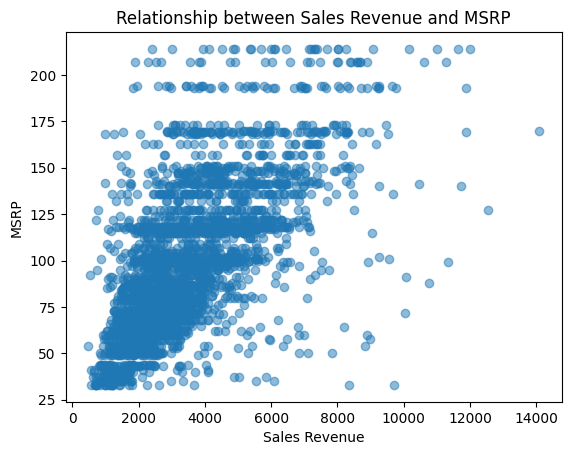

In [ ]:
# Create a scatter plot of sales revenue by product line and MSRP
plt.scatter(df['SALES'], df['MSRP'], alpha=0.5)
plt.xlabel('Sales Revenue')
plt.ylabel('MSRP')
plt.title('Relationship between Sales Revenue and MSRP')

# Show the plot
plt.show()

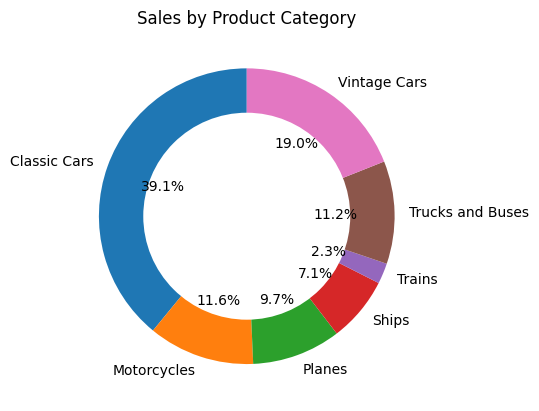

In [ ]:
category_sales = df5.groupby('CATEGORY')['SALES'].sum()

# Create a donut chart of sales by product category
fig, ax = plt.subplots()
ax.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Sales by Product Category')
plt.show()


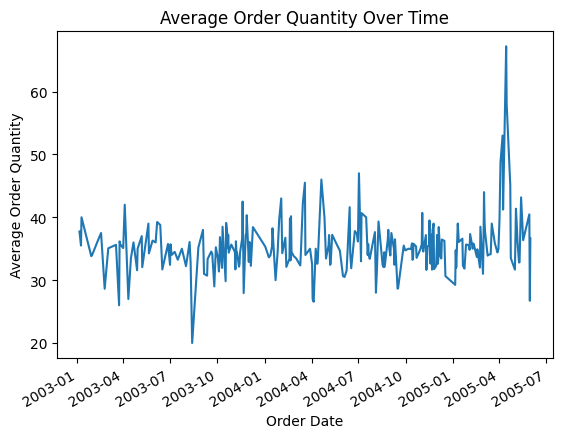

In [ ]:
# Group sales by order date and calculate the average order quantity
avg_quantity = df5.groupby('ORDERDATE')['QUANTITYORDERED'].mean()

# Create a line chart of average order quantity by order date
avg_quantity.plot(kind='line', title='Average Order Quantity Over Time')
plt.xlabel('Order Date')
plt.ylabel('Average Order Quantity')
plt.show()

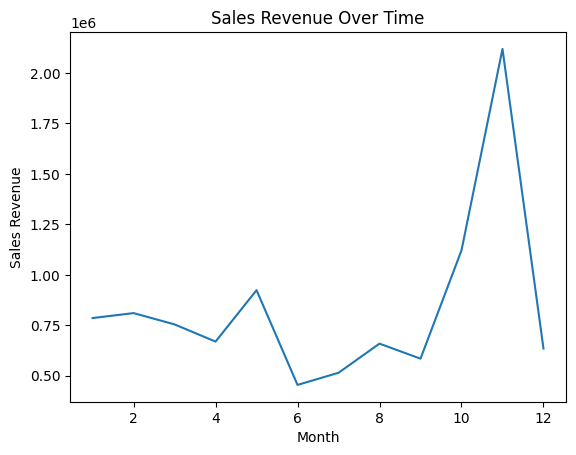

In [ ]:
# Group sales by year and calculate the total sales revenue
month_sales = df5.groupby('MONTH_ID')['SALES'].sum()

# Create a trend chart of sales revenue by year
month_sales.plot(kind='line', title='Sales Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.show()

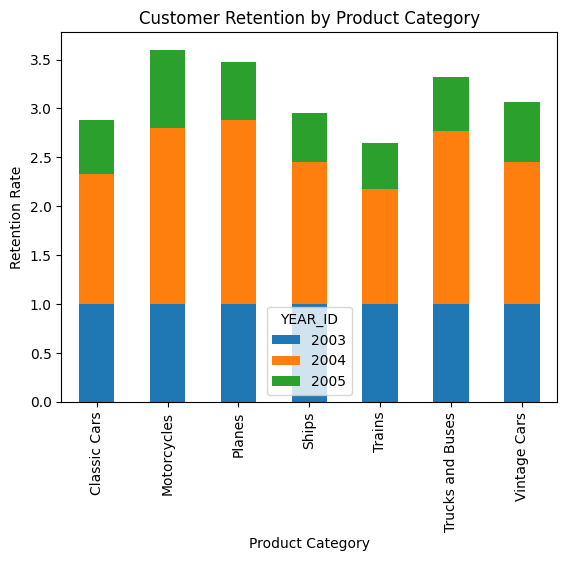

In [ ]:
pivot_table = pd.pivot_table(df5, values='ORDERNUMBER', index='CATEGORY', columns='YEAR_ID', aggfunc=pd.Series.nunique)
retention_rates = pivot_table.div(pivot_table.iloc[:,0], axis=0)

# Create a stacked bar chart of retention rates by product category
retention_rates.plot(kind='bar', stacked=True, title='Customer Retention by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Retention Rate')
plt.show()